## Neural Networks - Lambda School

Neural networks are an old idea in computational neuroscience, one that keeps on giving. Originally formulated from the theory of neuron activation in the 1940s, the first computational model of a neural network was built in 1958, the perceptron.

Neural nets are:

![A neural network with a hidden layer](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/560px-Artificial_neural_network.svg.png)

Author: [Cburnett](https://en.wikipedia.org/wiki/User:Cburnett)

* A layer of "neurons", that is, an array of floats. Each neuron is a weight.


* A bias neuron for each layer. The bias of the layer produces a y-intercept going into the next layer.

* A set of output neurons: the sum of all the weighs and biases

* A rectifier function $\sigma$ for each neuron. This just caps the value of any neuron and doesn't let it "go crazy". The original was the Sigmoid (1), followed by the ReLU (2), followed by the "Smooth ReLU", (3). Typically all three can be represented with \sigma() (4).

Popular rectifiers include:

$\sigma(x) = \frac{1}{1-\exp{x}}$

$\sigma(x) = ReLU(x)$

$\sigma(x) = LReLU(x)$

$\sigma(x) = PReLU(x)$


The simplest neural net is this:

![The simplest neural net: $\sigma(w_1x+b)$](https://www.lucidchart.com/publicSegments/view/21af3bf0-68c0-41a5-8270-4a9f8f5bb019/image.png)

The value of each neuron is equal to:

(5) $n_x = f(n_{x-1}) + b_i$

(6) $f_x = \sigma(f(n_{x-1}) + b_i)$

This is a recursive relationship - the final neuron n_n is the sum of all of the preceding terms. We calculate them in a forward direction by feeding an input data vector `d_i` into the first set of neurons `n_0` and \sigmoid and multiplying all the way to the end.

![Array diagram of a neural net](https://www.lucidchart.com/publicSegments/view/09e01af1-1156-4a76-a2d6-39c14fd24373/image.png)

As you can see, the storage requirement of a neural net is $O(mn^2)$ where $m$ is the number of hidden layers and $n$ is the dimensionality of $X$.

## Backpropagation

Backpropagation lets us use the derivative of the final output set of neurons with respect to their target values in order to improve the quality of all the preceding connections.

[3Blue1Brown](http://www.3blue1brown.com/)

## Loss calculation

Review the great neural network material in Google's Machine Learning Crash Course:

[Google ML CC](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/video-lecture)

Complete the full lessons in

![Introduction to Neural Nets, Training Neural Nets, and Multi-Class Neural Nets](https://www.dropbox.com/s/nxxhp9vm7xqtr8a/Screenshot%202018-05-29%2011.25.21.png?raw=1)

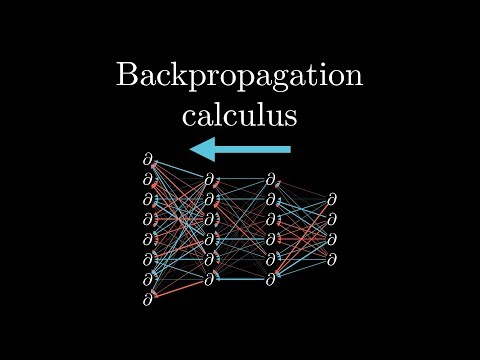

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('tIeHLnjs5U8')


Scikit Learn provides an easy to use and experiment with NN library, `MLPClassifier`. `MLPClassifier` doesn't support parallelization or GPUs and as such is not valuable for Deep Learning, but it suits our purposes for this assignment.

[MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

During this course we have studied a multitude of free available datasets including:

* titanic
* iris
* cars
* digits
* churn
* faces
* traffic infractions



In [0]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns

titanic = sns.load_dataset('titanic')

# drop duplicate/analogous columns
titanic = titanic.drop(['alive',
                        'adult_male',
                        'who',
                        'class',
                        'embark_town',
                        'deck'], axis=1)

# take care of missing data
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic['age'] = titanic['age'].fillna(method='ffill')

# convert binomials and categoricals to encoded labels
for label in ['embarked', 'sex', 'alone']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

print(titanic.head())

y = titanic['survived']
X = titanic.drop(['survived'],axis=1)

# MPL Classifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
                    hidden_layer_sizes=(15, 2),
                    activation='logistic',
                    solver='sgd',
                    alpha=1e-5,
                    batch_size=100, 
                    learning_rate='adaptive',
                    learning_rate_init=0.001,
                    max_iter=200,
                    shuffle=True,
                    random_state=42,
                    tol=1e-4 )
cross_val = KFold(n_splits=10, random_state=42)
scores = cross_val_score(model, X, y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - MLPClassifier: ", scores.mean())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    1  22.0      1      0   7.2500         2      0
1         1       1    0  38.0      1      0  71.2833         0      0
2         1       3    0  26.0      0      0   7.9250         2      1
3         1       1    0  35.0      1      0  53.1000         2      0
4         0       3    1  35.0      0      0   8.0500         2      1
Mean AUC Score - MLPClassifier:  0.7007721009723872


# Assignment

Select two or more of the above datasets. Load them, clean them, and prepare them for NN training. Use the following tutorial on MLP Training Curves as your guideline: 

[MLP Training Curves Example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html)

Produce the same graphs from the above example, demonstrating the loss over time of the MLP classifier on the different datasets, different learning rates, and different hidden layer configurations.

![curves](https://www.dropbox.com/s/v707n4e5egscz6q/Screenshot%202018-05-29%2011.29.05.png?raw=1)




7


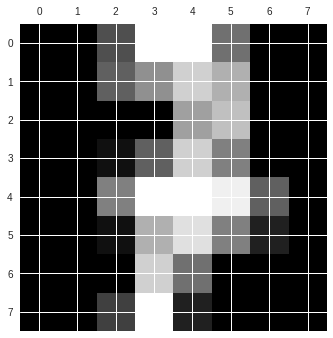

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

digits = load_digits()
data = digits.data
pics = digits.images
y = digits.target
print(y[888])

plt.gray() 
plt.matshow(pics[888]) 
plt.show() 



learning on dataset wine
training: constant learning-rate
Training set score: 1.000000
Training set loss: 0.039303
training: constant with momentum
Training set score: 1.000000
Training set loss: 0.009985
training: constant with Nesterov's momentum
Training set score: 1.000000
Training set loss: 0.010442
training: inv-scaling learning-rate


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.634831
Training set loss: 0.977669
training: inv-scaling with momentum
Training set score: 0.971910
Training set loss: 0.381967
training: inv-scaling with Nesterov's momentum
Training set score: 0.398876
Training set loss: 1.011968
training: adam
Training set score: 1.000000
Training set loss: 0.006125

learning on dataset boston
training: constant learning-rate
Training set score: 0.209486
Training set loss: 2.512671
training: constant with momentum
Training set score: 0.268775
Training set loss: 2.193449
training: constant with Nesterov's momentum
Training set score: 0.302372
Training set loss: 2.115844
training: inv-scaling learning-rate
Training set score: 0.031621
Training set loss: 3.624109
training: inv-scaling with momentum
Training set score: 0.118577
Training set loss: 3.239441
training: inv-scaling with Nesterov's momentum
Training set score: 0.112648
Training set loss: 3.244353
training: adam
Training set score: 0.420949
Training set loss: 1.778123

le

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling learning-rate
Training set score: 0.638843
Training set loss: 1.855465
training: inv-scaling with momentum
Training set score: 0.912632
Training set loss: 0.290584
training: inv-scaling with Nesterov's momentum
Training set score: 0.909293
Training set loss: 0.318387
training: adam
Training set score: 0.991653
Training set loss: 0.045934


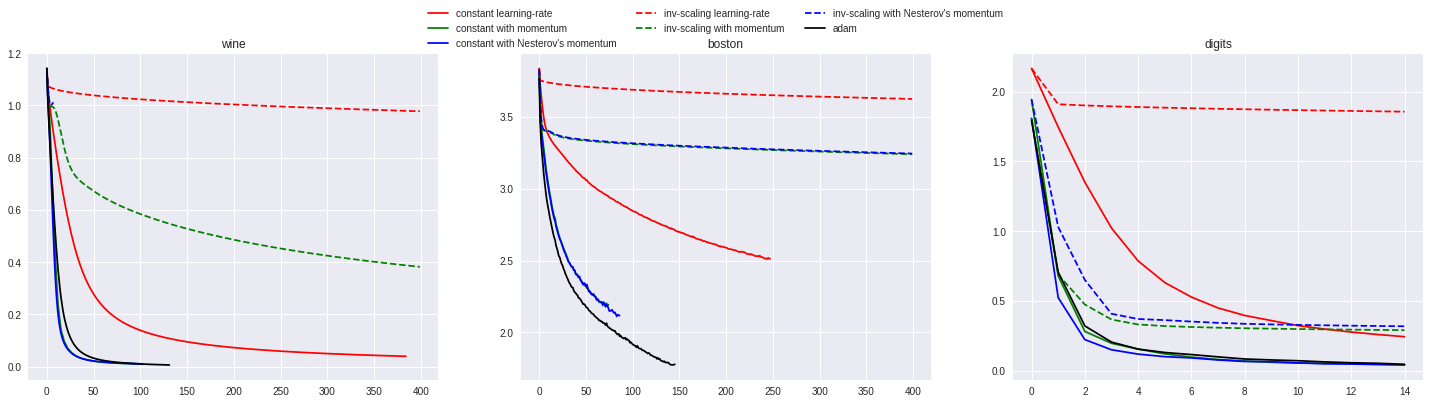

In [0]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9, 'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9, 'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1,3, figsize=(25, 6))
# load / generate some toy datasets
wine = datasets.load_wine()
boston = datasets.load_boston()
# iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(wine.data, wine.target),
             (boston.data, boston.target.astype('int')),
             (digits.data, digits.target)]
# data_sets = [(wine.data, wine.target),
#              (iris.data, iris.target),
#              (digits.data, digits.target)]


for ax, data, name in zip(axes.ravel(), data_sets, ['wine', 'boston', 'digits']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

In [0]:
class NN:
    def __init__(self, x, y, hidden_nodes):
        self.input      = x
        self.nodes      = hidden_nodes.append(y.shape[1])         
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    
    # initialize a list of theta matrices of random values    
    def get_theta(self):
        theta = [np.random.random((self.input.shape[1], self.nodes[0])).round(4)]
        for i in range(1, len(self.nodes)):
          theta.append(np.random.random((self.nodes[i-1]+1, self.nodes[i])).round(4))
        self.theta = theta
    
    # calculate hidden layers
    def get_layers(self):
        layers = [g(z(self.input, self.theta[0]))]
        bias = np.ones((layers[0].shape[0]))
        layers[0] = np.vstack((bias, layers[0].T)).T    # add bias nodes
        for i in range(1, len(theta)):                  # repeat for all layers
          layers.append(g(z(layers[i-1], self.theta[i])))
          if i != len(theta)-1:                         # add bias to all but last
            bias = np.ones((layers[i-1].shape[0]))
            layers[i] = np.vstack((bias, layers[i].T)).T
        self.layers = layers

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

nodes = [2, y.shape[1]]
bias = np.ones((X.shape[0]))
X = np.vstack((bias, X.T)).T

def g(z): return 1/(1 + np.exp(-z))            # sigmoid function
def dg(z): return z * (1.0 - z)                # sigmoid derivative
def z(x, t): return np.dot(x, t)               # z function

# initialize a list of theta matrices of random values
def get_theta(x, nodes):
  theta = [np.random.random((x.shape[1], nodes[0])).round(4)]
  for i in range(1, len(nodes)):
    theta.append(np.random.random((nodes[i-1]+1, nodes[i])).round(4))
  return theta

theta = get_theta(X, nodes)

# calculate hidden layers
def get_layers(x, theta):
  layers = [g(z(x, theta[0]))]
  bias = np.ones((layers[0].shape[0]))
  layers[0] = np.vstack((bias, layers[0].T)).T    # add bias nodes
  for i in range(1, len(theta)):                  # repeat for all layers
    layers.append(g(z(layers[i-1], theta[i])))
    if i != len(theta)-1:                         # add bias to all but last
      bias = np.ones((layers[i-1].shape[0]))
      layers[i] = np.vstack((bias, layers[i].T)).T
  return layers

layers = get_layers(X, theta)
output = layers[-1]                 # separate output layer for convenience
layers = layers[:-1]                # drop the output layer from hidden layers

# get derivatives
def get_delta(x, y, layers, theta):
  delta = [[] for i in range(len(theta))]
  delta[-1] = np.dot(layers[-1].T, (y-output))
  
  p1 = 2*(y-output) * dg(output)
  p2 = np.dot(p1, theta[-1].T)
  p3 = p2 * dg(layers[-1])
  p4 = np.dot(x.T, p3)
  delta[0]=p4[:,1:]
  
  return delta

delta = get_delta(X, y, layers, theta)

# adjust weights
theta = [theta[i] + delta[i] for i in range(len(theta))]

for i in range(1000):
  layers = get_layers(X, theta)
  output = layers[-1]
  layers = layers[:-1]
  delta = get_delta(X, y, layers, theta)
  theta = [theta[i] + delta[i] for i in range(len(theta))]
print(output)

[[0.00651971]
 [0.99395784]
 [0.99392542]
 [0.00716548]]
